In [ ]:
1  Project: Credit Card Fraud Detection
1.1  Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

In [ ]:
1.2  Introduction
This data set is enconded,so basically we wont be finding time series we will major our focus on random forest classifiers,extra tress classifier,adaboost etc and neural networks. .

In this first step, I’ll import the necessary libraries to import the data. After that, I’ll perform some basic commands to understand the structure of the data.

This analysis looks at two major questions;

How to detect credit card fraud?
Which model is best for credit card fraud detection?

In [ ]:
1.3  Data Wrangling
Tip: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for my analysis.

1.3.1  General Properties

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
#Read the given CSV file, and view some sample records
df = pd.read_csv("creditcard.csv")

In [12]:
pd.set_option('display.max_columns', 31)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
print('*'*23)
df.info()
print("*"*23)
df.isnull().sum()
print("**"*12)
df.shape

***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       28480

(284807, 31)

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

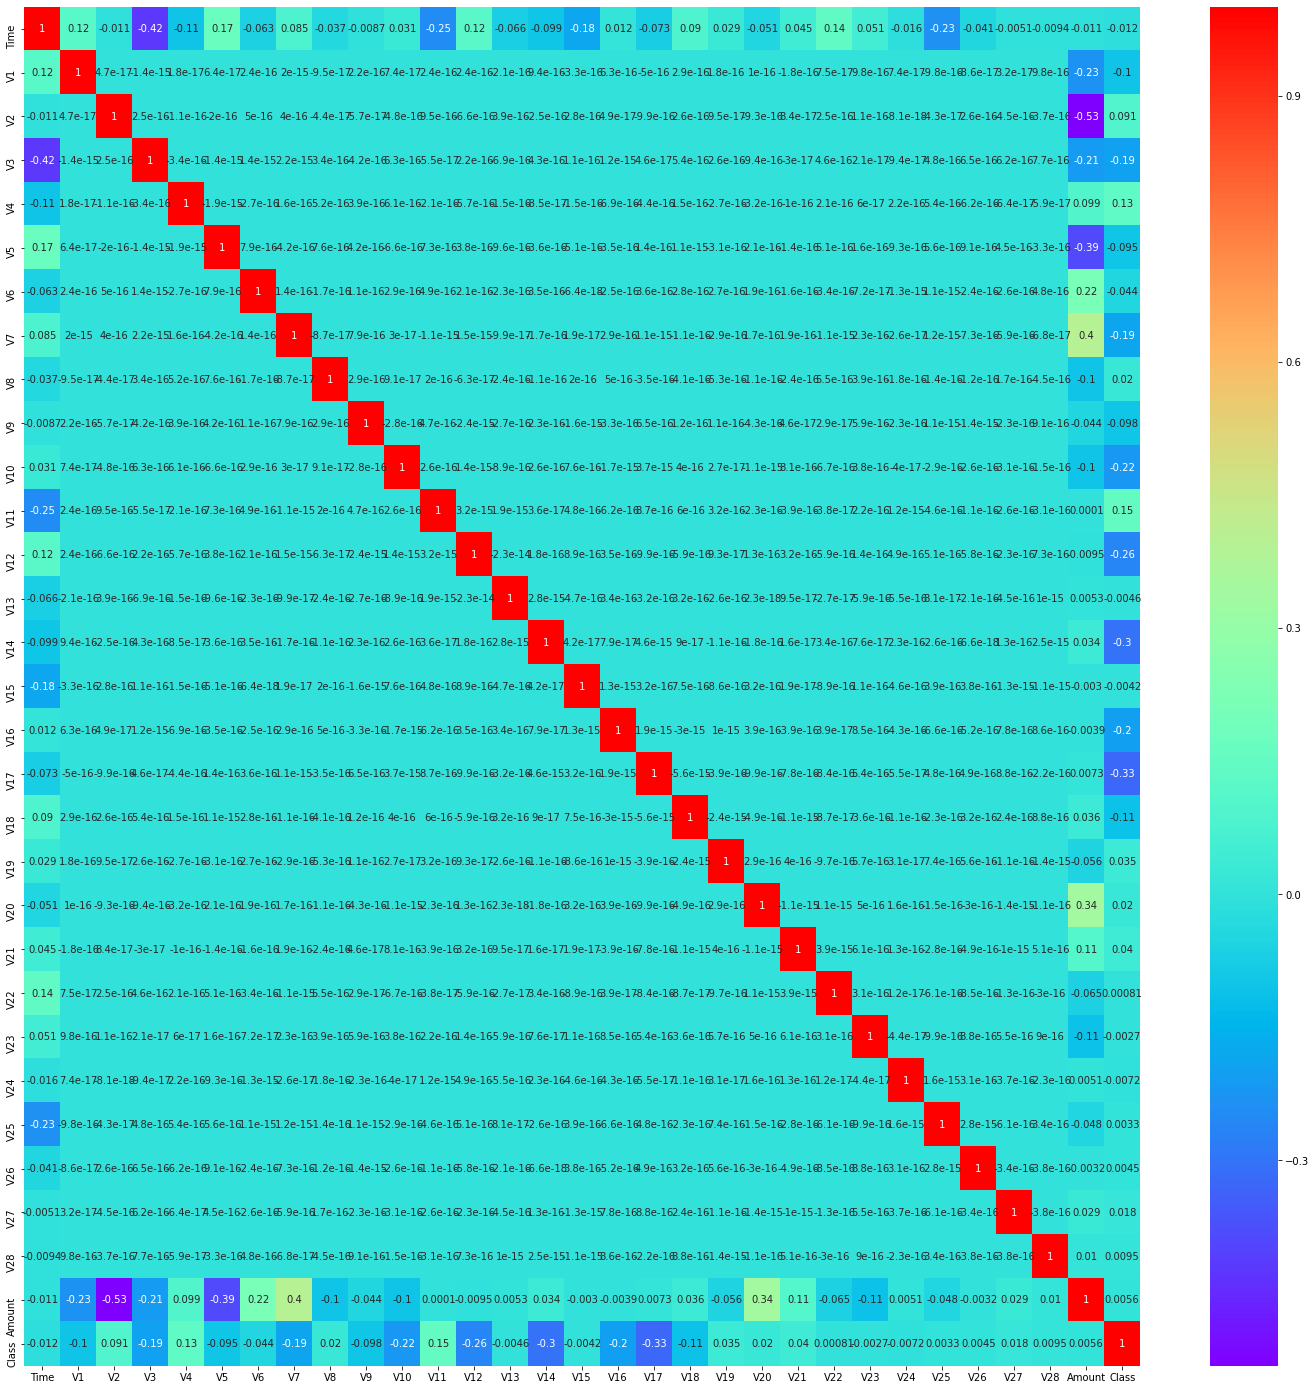

In [24]:
plt.figure(figsize= (25,25))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

### Modeling and Feature selection/importances

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
x = df.drop(columns='Class', axis="columns")
y = df["Class"]

In [32]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
print("upsampling the imbalance label (y) :\n", y_sm.value_counts())

upsampling the imbalance label (y) :
 1    284315
0    284315
Name: Class, dtype: int64


In [33]:
model = ExtraTreesClassifier()
model.fit(x_sm, y_sm)

ExtraTreesClassifier()

In [34]:
model.feature_importances_

array([0.01012294, 0.01628534, 0.01731269, 0.06177302, 0.10932986,
       0.00668592, 0.00777437, 0.01419718, 0.0063891 , 0.02642128,
       0.05395643, 0.09518005, 0.12957951, 0.00687655, 0.17552168,
       0.00532844, 0.05513563, 0.10907623, 0.02982165, 0.0143263 ,
       0.00407283, 0.00609335, 0.00528665, 0.00316533, 0.00632876,
       0.00441045, 0.00540627, 0.0064089 , 0.00329374, 0.00443957])

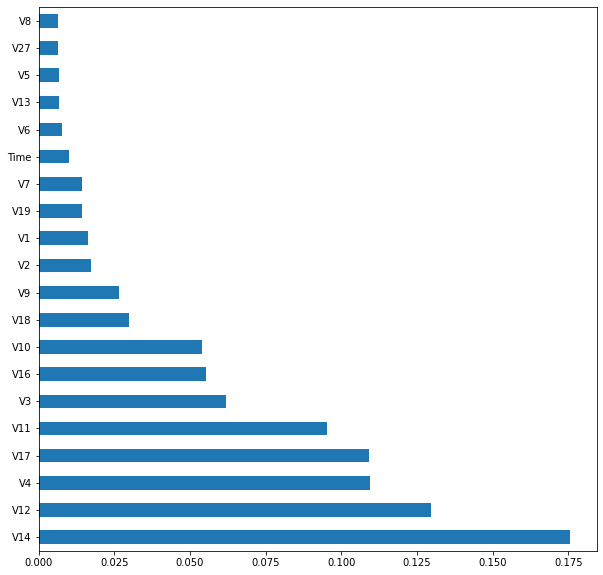

In [37]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_, index=x_sm.columns)
feat.nlargest(20).plot(kind='barh') #Top 20 important features

In [42]:
plot = feat.nlargest(20) 
print(plot.index)

Index(['V14', 'V12', 'V4', 'V17', 'V11', 'V3', 'V16', 'V10', 'V18', 'V9', 'V2',
       'V1', 'V19', 'V7', 'Time', 'V6', 'V13', 'V5', 'V27', 'V8'],
      dtype='object')


In [43]:
selected_cols = ['V14', 'V12', 'V4', 'V17', 'V11', 'V3', 'V16', 'V10', 'V18', 'V9', 'V2',
                               'V1', 'V19', 'V7', 'Time', 'V6', 'V13', 'V5', 'V27', 'V8']

In [46]:
x_new = x_sm[selected_cols]
print('Shape before selection:', x_sm.shape)
print("Shape after selection:", x_new.shape)

Shape before selection: (568630, 30)
Shape after selection: (568630, 20)


### Train/Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_sm, test_size=0.30, random_state=42)

In [48]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
pred = rand.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9999
